In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [28]:
df= pd.read_csv("TSA2002_2015.csv", low_memory=False)

In [39]:
df.shape

(204270, 13)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204270 entries, 0 to 204269
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   204267 non-null  object        
 1   Date Received  204004 non-null  datetime64[ns]
 2   Incident Date  201920 non-null  datetime64[ns]
 3   Airport Code   195743 non-null  object        
 4   Airport Name   195743 non-null  object        
 5   Airline Name   169893 non-null  object        
 6   Claim Type     196354 non-null  object        
 7   Claim Site     203527 non-null  object        
 8   Item           200301 non-null  object        
 9   Claim Amount   200224 non-null  object        
 10  Status         204262 non-null  object        
 11  Close Amount   135315 non-null  object        
 12  Disposition    131359 non-null  object        
dtypes: datetime64[ns](2), object(11)
memory usage: 20.3+ MB


In [29]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,04-Jan-02,12/12/2002 00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,02-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,04-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,07-Feb-02,01/06/2003 00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2.00503E+12,18-Feb-02,02/05/2005 00:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204265,2.01512E+12,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204266,2.01512E+12,17-Dec-15,02-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204267,2.01601E+12,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204268,2.01601E+12,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


In [32]:
df["Date Received"]= pd.to_datetime(df["Date Received"], format="mixed")

In [33]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,12/12/2002 00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2002-02-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,2002-02-04,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,2002-02-07,01/06/2003 00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2.00503E+12,2002-02-18,02/05/2005 00:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204265,2.01512E+12,2015-11-20,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204266,2.01512E+12,2015-12-17,02-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204267,2.01601E+12,2015-12-22,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204268,2.01601E+12,2015-12-30,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


In [34]:
df["Incident Date"]= pd.to_datetime(df["Incident Date"], errors="coerce", format="mixed")

In [35]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2.00503E+12,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204265,2.01512E+12,2015-11-20,2015-10-16,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204266,2.01512E+12,2015-12-17,2015-12-02,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204267,2.01601E+12,2015-12-22,2015-12-20,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204268,2.01601E+12,2015-12-30,2015-12-28,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


In [37]:
df.shape

(204270, 13)

In [36]:
df.isna().sum()

Claim Number         3
Date Received      266
Incident Date     2350
Airport Code      8527
Airport Name      8527
Airline Name     34377
Claim Type        7916
Claim Site         743
Item              3969
Claim Amount      4046
Status               8
Close Amount     68955
Disposition      72911
dtype: int64

<Axes: >

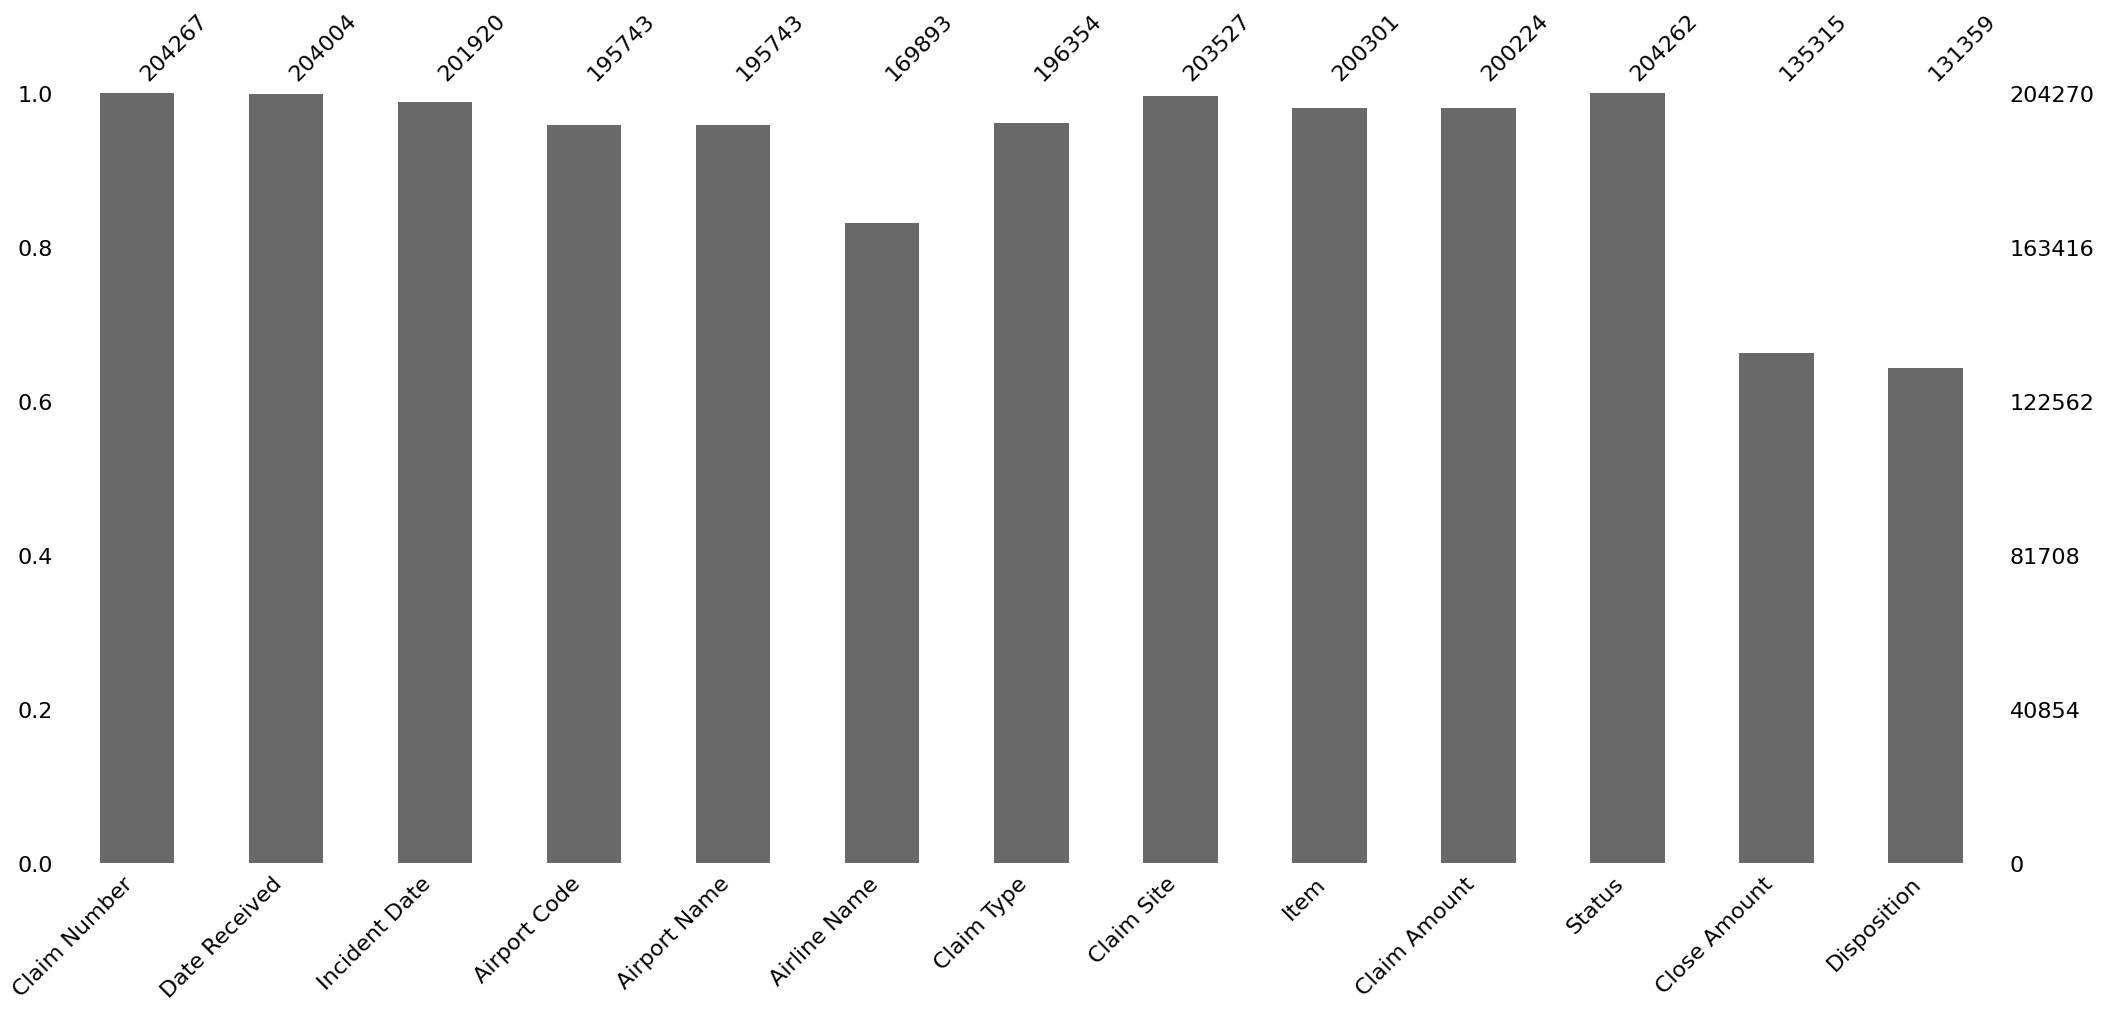

In [41]:
plt.figure(figsize=(14,7))
msno.bar(df)
plt.title("Graph of Missing Values")

In [43]:
df.isnull().mean() *100

Claim Number      0.001469
Date Received     0.130220
Incident Date     1.150438
Airport Code      4.174377
Airport Name      4.174377
Airline Name     16.829197
Claim Type        3.875263
Claim Site        0.363734
Item              1.943017
Claim Amount      1.980712
Status            0.003916
Close Amount     33.756792
Disposition      35.693445
dtype: float64